In [1]:
import pandas as pd

q1

In [2]:
!pip install quandl

In [3]:
import quandl

In [4]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2021-01-01')

In [5]:
goog=quandl.get('WIKI/GOOG.11',start_date=start,end_date=end)
tsla=quandl.get('WIKI/TSLA.11',start_date=start,end_date=end)
amzn=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [6]:
goog.to_csv('GOOG_CLOSE')
tsla.to_csv('TSLA_CLOSE')
amzn.to_csv('AMZN_CLOSE')

In [7]:
goog.head()

,Adj. Close
Date,
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


In [8]:
goog.iloc[0]['Adj. Close']

558.46

In [9]:
for stock_df in (goog,tsla,amzn):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [10]:
goog.head()

,Adj. Close,Normed Return
Date,,
2014-03-27,558.46,1.000000
2014-03-28,559.99,1.002740
2014-03-31,556.97,0.997332
2014-04-01,567.16,1.015579
2014-04-02,567.00,1.015292


In [11]:
for stock_df,allo in zip([goog,tsla,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [12]:
goog.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2014-03-27,558.46,1.000000,0.300000
2014-03-28,559.99,1.002740,0.300822
2014-03-31,556.97,0.997332,0.299200
2014-04-01,567.16,1.015579,0.304674
2014-04-02,567.00,1.015292,0.304588


In [13]:
for stock_df in (goog,tsla,amzn):
    stock_df['Position Values']=stock_df['Allocation']*1000000

In [14]:
goog.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2014-03-27,558.46,1.000000,0.300000,300000.000000
2014-03-28,559.99,1.002740,0.300822,300821.903091
2014-03-31,556.97,0.997332,0.299200,299199.584572
2014-04-01,567.16,1.015579,0.304674,304673.566594
2014-04-02,567.00,1.015292,0.304588,304587.615944


In [15]:
portfolio_val=pd.concat([goog['Position Values'],tsla['Position Values'],amzn['Position Values']],axis=1)

In [16]:
portfolio_val.tail()

,Position Values,Position Values,Position Values
Date,,,
2018-03-21,586011.531712,2.254487e+06,3.534290e+06
2018-03-22,563556.924399,2.201567e+06,3.449925e+06
2018-03-23,548778.784515,2.147721e+06,3.341473e+06
2018-03-26,565775.525552,2.166524e+06,3.476200e+06
2018-03-27,539931.239480,1.988462e+06,3.344803e+06


In [17]:
portfolio_val.columns=['goog Pos','tsla Pos','AMZN Pos']

In [18]:
portfolio_val.tail()

,goog Pos,tsla Pos,AMZN Pos
Date,,,
2018-03-21,586011.531712,2.254487e+06,3.534290e+06
2018-03-22,563556.924399,2.201567e+06,3.449925e+06
2018-03-23,548778.784515,2.147721e+06,3.341473e+06
2018-03-26,565775.525552,2.166524e+06,3.476200e+06
2018-03-27,539931.239480,1.988462e+06,3.344803e+06


In [19]:
portfolio_val['Total Pos']=portfolio_val.sum(axis=1)

In [20]:
portfolio_val.tail()

,goog Pos,tsla Pos,AMZN Pos,Total Pos
Date,,,,
2018-03-21,586011.531712,2.254487e+06,3.534290e+06,6.374789e+06
2018-03-22,563556.924399,2.201567e+06,3.449925e+06,6.215048e+06
2018-03-23,548778.784515,2.147721e+06,3.341473e+06,6.037973e+06
2018-03-26,565775.525552,2.166524e+06,3.476200e+06,6.208499e+06
2018-03-27,539931.239480,1.988462e+06,3.344803e+06,5.873195e+06


In [21]:
portfolio_val['Total Pos'][0]

600000.0

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

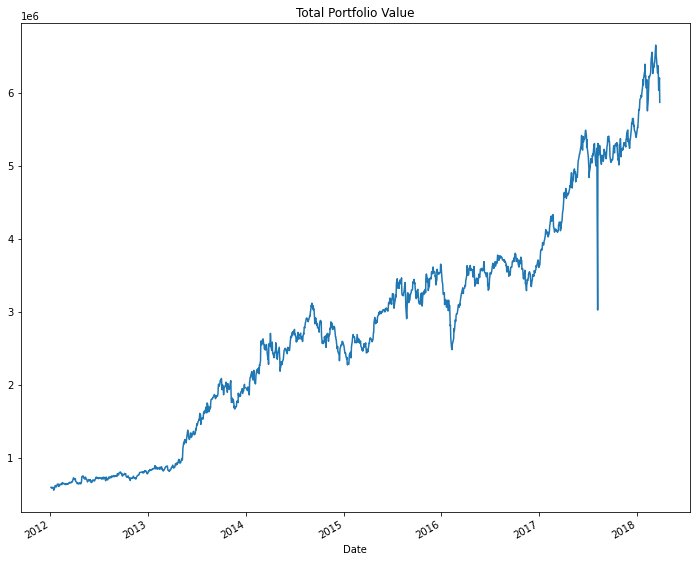

In [23]:
portfolio_val['Total Pos'].plot(figsize=(12,10))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

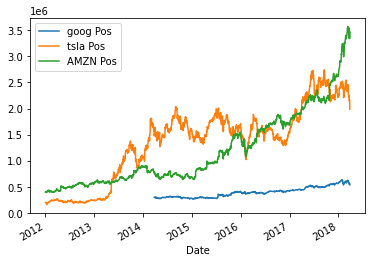

In [24]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

q3

In [25]:
portfolio_val['Total Pos'].pct_change(1)

Date
2012-01-03         NaN
2012-01-04   -0.010052
2012-01-05   -0.006699
2012-01-06    0.016400
2012-01-09   -0.011051
                ...   
2018-03-21    0.004496
2018-03-22   -0.025058
2018-03-23   -0.028491
2018-03-26    0.028242
2018-03-27   -0.054007
Name: Total Pos, Length: 1567, dtype: float64

In [26]:
portfolio_val['Daily Returns']=portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,goog Pos,tsla Pos,AMZN Pos,Total Pos,Daily Returns
Date,,,,,
2012-01-03,NaN,2.000000e+05,4.000000e+05,6.000000e+05,NaN
2012-01-04,NaN,1.973647e+05,3.966039e+05,5.939686e+05,-0.010052
2012-01-05,NaN,1.931624e+05,3.968273e+05,5.899897e+05,-0.006699
2012-01-06,NaN,1.916667e+05,4.079987e+05,5.996653e+05,0.016400
2012-01-09,NaN,1.940883e+05,3.989499e+05,5.930382e+05,-0.011051
...,...,...,...,...,...
2018-03-21,586011.531712,2.254487e+06,3.534290e+06,6.374789e+06,0.004496
2018-03-22,563556.924399,2.201567e+06,3.449925e+06,6.215048e+06,-0.025058
2018-03-23,548778.784515,2.147721e+06,3.341473e+06,6.037973e+06,-0.028491


In [27]:
portfolio_val['Daily Returns'].mean()

0.001849200435446345

In [28]:
portfolio_val['Daily Returns'].std()

0.029218868638935264

<AxesSubplot:ylabel='Density'>

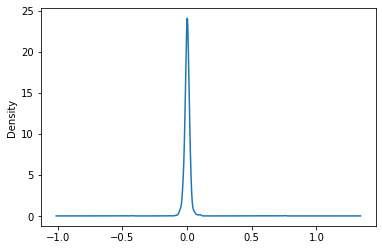

In [29]:
portfolio_val['Daily Returns'].plot(kind='kde')

In [30]:
SR=portfolio_val['Daily Returns'].mean()/portfolio_val['Daily Returns'].std()
SR

0.06328788627298917

In [31]:
ASR=(252**0.5)*SR
ASR

1.004664048487607

<AxesSubplot:ylabel='Density'>

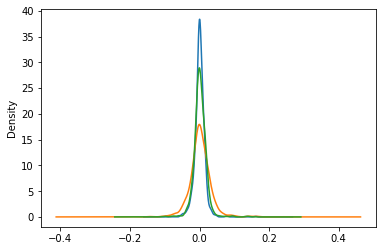

In [32]:
goog['Adj. Close'].pct_change(1).plot(kind='kde')
tsla['Adj. Close'].pct_change(1).plot(kind='kde')
amzn['Adj. Close'].pct_change(1).plot(kind='kde')


In [33]:
import numpy as np                              
np.sqrt(252)*(np.mean(0.001-0.0002)/0.001)

12.699606293110037

q4

In [34]:
stocks = ['goog','AMZN']


In [35]:
from pandas_datareader import data as dr

In [36]:
import numpy as np  
from pandas_datareader import data as dr 
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [38]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2012-01-01',end='2021-01-01')['Adj Close']

In [39]:
stock_data.head()

,goog,AMZN
Date,,
2012-01-03,331.462585,179.029999
2012-01-04,332.892242,177.509995
2012-01-05,328.274536,177.610001
2012-01-06,323.796326,182.610001
2012-01-09,310.067780,178.559998


<AxesSubplot:xlabel='Date'>

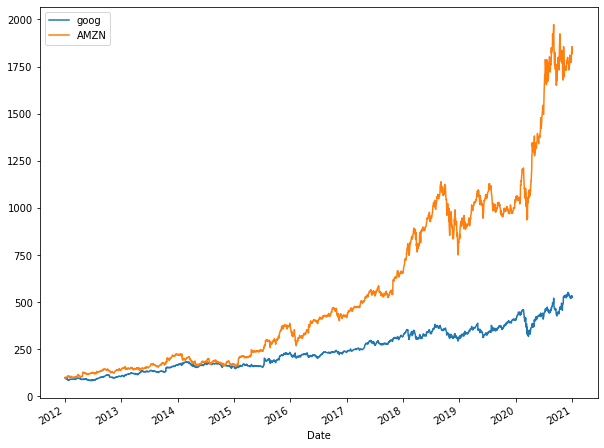

In [40]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

In [41]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,goog,AMZN
Date,,
2012-01-03,NaN,NaN
2012-01-04,0.004304,-0.008526
2012-01-05,-0.013969,0.000563
2012-01-06,-0.013736,0.027763
2012-01-09,-0.043324,-0.022428
...,...,...
2020-12-24,0.003728,-0.003957
2020-12-28,0.021190,0.034470
2020-12-29,-0.009828,0.011517


In [42]:
#To obtain annual average returns!
logReturns.mean() * 250 

goog    0.183848
AMZN    0.320339
dtype: float64

In [43]:
stock_data.corr()

,goog,AMZN
goog,1.000000,0.960654
AMZN,0.960654,1.000000


In [44]:
# generating weights code
numberOfStocks = len(stocks)
numberOfStocks

2

In [45]:
weights1 = [0.19018562, 0.93358835]

weights1

[0.19018562, 0.93358835]

In [46]:
weights = weights1/np.sum(weights1)
weights

array([0.16923832, 0.83076168])

In [47]:
(weights * logReturns.mean()).sum() * 250

0.2972392541896729

In [48]:
np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights)))

0.2804180244733001

In [49]:
expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []

# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) 
weightList1 = np.array(weightList1) 
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of goog": weightList0, "Weight of AMZN": weightList1, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of goog,Weight of AMZN,Expected Return,Standard deviation
0,0.546725,0.453275,0.245716,0.245473
1,0.912125,0.087875,0.195842,0.246257
2,0.566977,0.433023,0.242952,0.244562
3,0.492545,0.507455,0.253111,0.248439
4,0.959194,0.040806,0.189418,0.248982


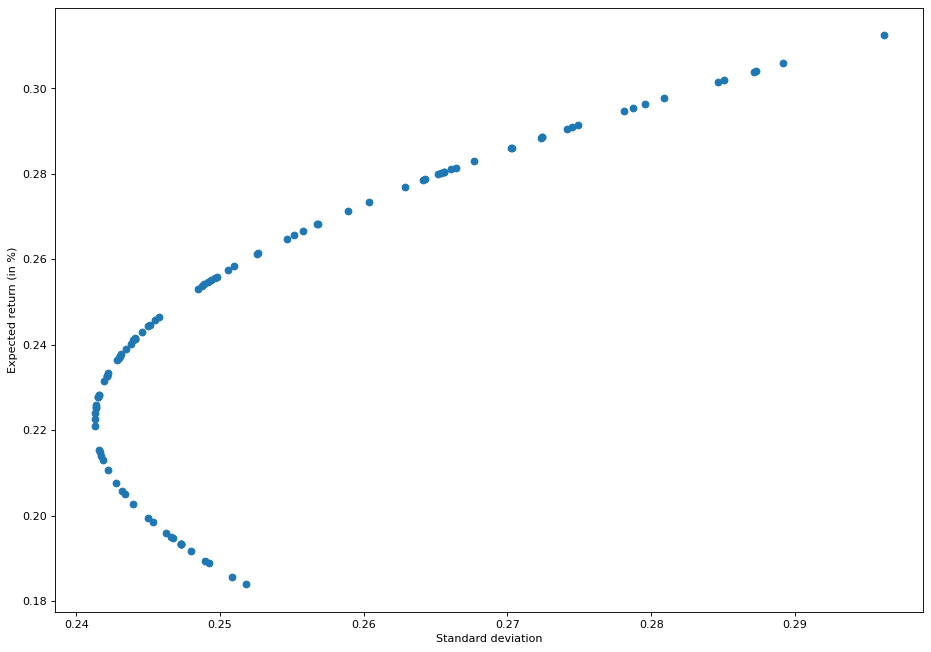

In [50]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [51]:
df[(df["Expected Return"]>0.11) & (df["Expected Return"]< 0.12)].sort_values(by=['Expected Return'])


,Weight of goog,Weight of AMZN,Expected Return,Standard deviation


In [52]:
df[(df["Expected Return"]>0.11)].sort_values(by=['Expected Return']).head(10)

,Weight of goog,Weight of AMZN,Expected Return,Standard deviation
75,0.999715,0.000285,0.183887,0.251777
8,0.986507,0.013493,0.185690,0.250821
20,0.962992,0.037008,0.188899,0.249227
4,0.959194,0.040806,0.189418,0.248982
93,0.942491,0.057509,0.191698,0.247950
27,0.931277,0.068723,0.193228,0.247297
56,0.931221,0.068779,0.193236,0.247294
38,0.931194,0.068806,0.193240,0.247292
62,0.930603,0.069397,0.193320,0.247259
81,0.920729,0.079271,0.194668,0.246713


In [53]:
df["Expected Return"].mean()

0.24682813867639603

In [54]:
df["Expected Return"].sort_values().median()

0.24366378100914632

In [55]:
df[(df["Expected Return"]>0.135)].sort_values(by=['Expected Return'])


,Weight of goog,Weight of AMZN,Expected Return,Standard deviation
75,0.999715,0.000285,0.183887,0.251777
8,0.986507,0.013493,0.185690,0.250821
20,0.962992,0.037008,0.188899,0.249227
4,0.959194,0.040806,0.189418,0.248982
93,0.942491,0.057509,0.191698,0.247950
...,...,...,...,...
85,0.134750,0.865250,0.301947,0.285069
24,0.120005,0.879995,0.303959,0.287120
87,0.118827,0.881173,0.304120,0.287285
25,0.105568,0.894432,0.305930,0.289162


In [56]:
df.loc[15]

Weight of goog        0.400633
Weight of AMZN        0.599367
Expected Return       0.265656
Standard deviation    0.255159
Name: 15, dtype: float64